# ***PS4***

## **Question 1**

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np

hand_data_path = "./all-hands.dat" # constant for the path of the data

# load the data
hand_data = pd.read_csv(hand_data_path, header = None)
hand_data.head()

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,296,509,305,481,329,465,350,443,365,417,...,136,369,141,407,152,442,153,477,142,511
1,284,511,299,488,321,471,335,449,348,426,...,127,369,131,406,140,442,141,477,126,510
2,293,510,310,490,328,472,340,450,352,427,...,126,375,130,410,137,444,145,476,133,507
3,310,506,323,483,345,466,359,443,372,419,...,143,375,148,411,158,445,165,479,156,511
4,334,509,351,490,369,472,381,449,392,427,...,160,377,165,412,174,444,185,476,181,509


### **(a)**

In [ ]:
"""
This function calculates the mean of each column
and separates them into two numpy arrays where one
correlates with the x-axis and the other with the
y-axis.
@data = the data to feed into the function

"""
def calculate_means(data):
  m = data.shape[1] # number of "examples"
  n = data.shape[0] # number of datapoints

  # creates 72 x 1 np.arrays that stores the means
  x_axis_np = np.ones(shape = ((int)(m/2), 1))
  y_axis_np = np.ones(shape = ((int)(m/2), 1))
  index_to_add = 0 # keep track of the index

  total_mean = []

  # loop through all the "examples"
  for col in range(m):
    column = data.loc[:, col]
    sum = 0

    # loops through all the points
    for row in range(n):
      sum += data.loc[row, col]

    # take the average and place in correct array
    avg = sum / n
    total_mean.append(avg)
    if col % 2 == 0: # if the column is even then put in x[index]
      x_axis_np[index_to_add] = avg
    else:
      y_axis_np[index_to_add] = avg
      index_to_add += 1 # increment index_to_add since everytime there is an odd index, both x and y arrays have filled at the same index location

  return x_axis_np, y_axis_np, total_mean

x_axis_np, y_axis_np, total_mean = calculate_means(hand_data)

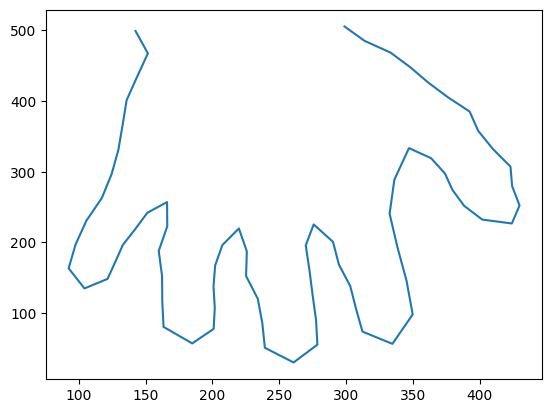

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax

plt.plot(x_axis_np, y_axis_np)

In [ ]:
print(x_axis_np)
print(y_axis_np.shape)

[[298.88888889]
 [313.94444444]
 [333.33333333]
 [348.16666667]
 [361.5       ]
 [376.44444444]
 [392.55555556]
 [399.        ]
 [410.05555556]
 [423.16666667]
 [424.38888889]
 [429.94444444]
 [424.16666667]
 [402.        ]
 [388.38888889]
 [379.72222222]
 [374.11111111]
 [363.72222222]
 [347.16666667]
 [336.22222222]
 [332.66666667]
 [338.55555556]
 [345.33333333]
 [349.94444444]
 [334.77777778]
 [312.33333333]
 [307.55555556]
 [303.22222222]
 [294.72222222]
 [290.27777778]
 [275.83333333]
 [269.88888889]
 [272.66666667]
 [275.        ]
 [277.55555556]
 [278.61111111]
 [260.77777778]
 [239.27777778]
 [237.38888889]
 [234.        ]
 [225.22222222]
 [225.77777778]
 [219.83333333]
 [207.44444444]
 [202.05555556]
 [200.83333333]
 [201.77777778]
 [200.94444444]
 [184.88888889]
 [163.44444444]
 [162.5       ]
 [162.33333333]
 [159.83333333]
 [166.22222222]
 [166.05555556]
 [151.27777778]
 [142.33333333]
 [132.94444444]
 [127.33333333]
 [121.5       ]
 [104.22222222]
 [ 92.38888889]
 [ 97.61

### **(b)**

In [ ]:
"""
This function calculates the covariance of
two columns and returns the value.
@X = the first vector (pd.series)
@Y = the second vector (pd.series)
"""
def calculate_covariance(X, Y):
  n = len(X) # get the length of a vector

  sum = 0 # sum
  X_mean = np.mean(X) # gets the mean
  Y_mean = np.mean(Y)

  # loop over all elements in the vectors
  for i in range(n):
    sum += (X[i] - X_mean) * (Y[i] - Y_mean)

  return sum / (n - 1) # divide by n - 1

# print(calculate_covariance(hand_data.loc[:, 0], hand_data.loc[:, 0])) # testing purpose

In [ ]:
"""
This function calculates the covariance matrix
of a particular dataset .
@data = the dataset you want to compute the covariance
        matrix with
"""
def calculate_covariance_matrix(data):
  n = data.shape[1] # grabs number of features
  cov_matrix = np.ones(shape = (n, n)) # initializes a covariance matrix
  total_variance = 0

  # loop over each features with each other
  for i in range(n): # outer loop
    for j in range(n): # inner loop
      cov_value = calculate_covariance(data.loc[:, i], data.loc[:, j])
      cov_matrix[i][j] = cov_value
      total_variance += cov_value

  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  total_variance = sum(eigenvalues)

  return cov_matrix, total_variance


covariance_matrix, total_variance = calculate_covariance_matrix(hand_data)
print("The total variance is:", total_variance)

The total variance is: 48685.06862745098


### **(c)**

In [ ]:
print("The covariance between x1 and x2 coordinates is", covariance_matrix[0][2])

The covariance between x1 and x2 coordinates is 533.1111111111112


In [ ]:
"""
This function calculates the correlation between two vectors.
@X = the first vector
@Y = the second vector
"""
def calculate_correlation(X, Y):
  return np.dot(X, Y) / (np.linalg.norm(X) * np.linalg.norm(Y))

x1_x2_corr = calculate_correlation(hand_data.loc[:, 0], hand_data.loc[:, 2])
print("The correlation between x1 and x2 is", x1_x2_corr)

The correlation between x1 and x2 is 0.9999507626010683


In [ ]:
# testing purposes
# test_data = pd.concat([hand_data.loc[:, 0], hand_data.loc[:, 2]], axis = 1)
# print(test_data.corr())

The correlation comes out to such a high value for $x1$ and $x2$ because of how close they are in the cartesian plane. Because of their proximity, this seems to imply that the two variables have some a strong relationship with each other.

### **(d)**

In [ ]:
"""
This function is the pca function such that it first gets the covariance matrix.
The function decomposes the covariance matrix into the eigenvalues and vectors
and returns them.
@data = the dataset (pd.DataFrame())
"""
def pca(data):
  cov_matrix, _ = calculate_covariance_matrix(data)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  return eigenvalues, eigenvectors

eigenvalues, eigenvectors = pca(hand_data)
print(eigenvalues, "\n")
print(eigenvectors)
print(eigenvectors.shape)

[-5.94610436e-12 -4.77878874e-12 -4.15340386e-12 -3.31790644e-12
 -3.18622970e-12 -2.66947514e-12 -2.13301935e-12 -2.09402010e-12
 -1.87634378e-12 -1.78238594e-12 -1.74987949e-12 -1.64637289e-12
 -1.50062012e-12 -1.47111603e-12 -1.31505393e-12 -1.24653775e-12
 -1.12836991e-12 -1.11492129e-12 -1.01146385e-12 -9.13709001e-13
 -9.09093060e-13 -8.84038110e-13 -7.32566058e-13 -7.05531045e-13
 -6.71534795e-13 -6.61848830e-13 -6.51344608e-13 -5.26713998e-13
 -5.19852341e-13 -5.06069372e-13 -4.47442683e-13 -4.45339798e-13
 -3.85151176e-13 -3.65779198e-13 -3.56035898e-13 -3.04352621e-13
 -3.03136650e-13 -3.00157363e-13 -2.93777495e-13 -2.74675467e-13
 -2.41193196e-13 -2.33550296e-13 -2.22792023e-13 -2.10485342e-13
 -1.91360409e-13 -1.78684349e-13 -1.66527083e-13 -1.57164462e-13
 -1.36122167e-13 -1.34852858e-13 -1.32026710e-13 -1.13377561e-13
 -1.04836976e-13 -1.00359260e-13 -1.00313390e-13 -8.25414581e-14
 -8.18167485e-14 -6.86139740e-14 -5.26415191e-14 -5.06485981e-14
 -4.85225943e-14 -1.77541

### **(e)**

In [ ]:
"""
This function calculates the proportion of variance.
@lambda_val = eigenvalues associated with covariance matrix decomposition
"""
def proportion_of_variances(lambda_val):
  total = sum(lambda_val) # gets the sum
  n = len(lambda_val) # length of lambda value
  prop_of_var = [0] * n # stores a list

  # loops through all lambda values
  for i in range(n):
    prop_of_var[n - 1 - i] = lambda_val[i]/total

  return prop_of_var

proportion_of_variance = proportion_of_variances(eigenvalues)
print(proportion_of_variance)


[0.5139463065694261, 0.1662422128560453, 0.1185491007899576, 0.09901248136046609, 0.05316196935846104, 0.02841361038649107, 0.008437953596745235, 0.004450736023973565, 0.0027430387116735367, 0.0017395704208413622, 0.0010002452894401586, 0.0006384336709668961, 0.0005534816582930662, 0.0003981532821953453, 0.00034527695913031065, 0.00027563881638943135, 9.179024950377033e-05, 1.3034786389111161e-16, 1.1762669891715157e-16, 9.398356934415041e-17, 9.208985386600644e-17, 7.90971341856854e-17, 6.67073552618957e-17, 5.748697080985284e-17, 4.568442433395182e-17, 4.2526442499081517e-17, 4.071592290972059e-17, 3.4483040446731403e-17, 3.1520747873119067e-17, 3.1508609776901764e-17, 3.017557775408226e-17, 2.7316179329329357e-17, 2.2400419988034357e-17, 1.967146253141181e-17, 1.958471440133536e-17, 1.7475015880350195e-17, 1.7018909771833107e-17, 1.6268883097198146e-17, 1.4600878323895668e-17, 1.4017823247088214e-17, 1.349127083378547e-17, 1.2759761306627703e-17, 1.172405464415087e-17, 1.09480860190

144


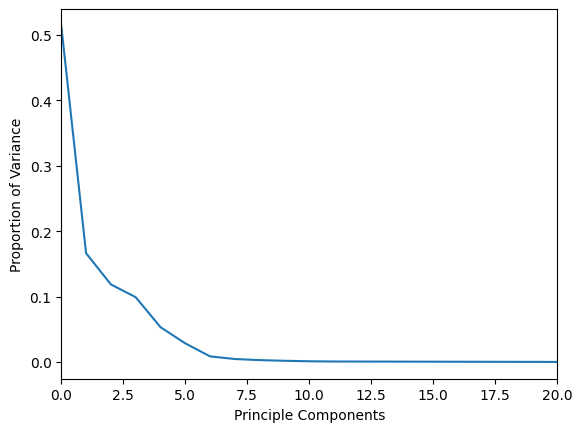

In [ ]:
plt.plot(proportion_of_variance)
plt.xlabel("Principle Components")
plt.ylabel("Proportion of Variance")
plt.xlim(0, 20)
print(len(proportion_of_variance))

In [ ]:
for i in range(len(proportion_of_variance)): print(i + 1, "with value", proportion_of_variance[i])

1 with value 0.5139463065694261
2 with value 0.1662422128560453
3 with value 0.1185491007899576
4 with value 0.09901248136046609
5 with value 0.05316196935846104
6 with value 0.02841361038649107
7 with value 0.008437953596745235
8 with value 0.004450736023973565
9 with value 0.0027430387116735367
10 with value 0.0017395704208413622
11 with value 0.0010002452894401586
12 with value 0.0006384336709668961
13 with value 0.0005534816582930662
14 with value 0.0003981532821953453
15 with value 0.00034527695913031065
16 with value 0.00027563881638943135
17 with value 9.179024950377033e-05
18 with value 1.3034786389111161e-16
19 with value 1.1762669891715157e-16
20 with value 9.398356934415041e-17
21 with value 9.208985386600644e-17
22 with value 7.90971341856854e-17
23 with value 6.67073552618957e-17
24 with value 5.748697080985284e-17
25 with value 4.568442433395182e-17
26 with value 4.2526442499081517e-17
27 with value 4.071592290972059e-17
28 with value 3.4483040446731403e-17
29 with value 

It seems as if all $144$ values are technically not $0$; however, most of are pretty close to it. I would argue that the threshold for an eigenvalue to be $0$ would be anything less than $1e^{-6}$. Therefore, I would argue that $17$ values are not nonzero. This implies that we do not need all the dimensions of our data to achieve high accuracy.

### **(f)**

In [ ]:
"""
Simply creates the s list given the first principal component.
@pc = first principle component (float)
"""
def get_s_list(pc):
  # initial setup
  sqrt_val = np.sqrt(pc)
  s_list = [0] * 5

  # fill up the s_list
  s_list[0] = -3 * sqrt_val
  s_list[1] = -1.5 * sqrt_val
  s_list[3] = 1.5 * sqrt_val
  s_list[4] = 3 * sqrt_val

  return s_list

s_list_1 = get_s_list(eigenvalues[-1]) # note that the eigenvalue is in ascending order
print(s_list_1)

[-474.545678365547, -237.2728391827735, 0, 237.2728391827735, 474.545678365547]


In [ ]:
"""
This function will plot the sequences of the hand shapes.
It computes only ONE plot.
@pc = the principle component of interest
@eigenvector = the eigenvector of the provided pc
@mean = the mean data with both x and y mean
"""
mean = np.concatenate([x_axis_np, y_axis_np], axis = 1)

def plot_figure(pc, eigenvector, mean):
  # reshape eigenvector
  eigenvector_reshape = np.ones(shape = (72, 2))
  # eigenvector_reshape = np.reshape(eigenvector, (72, 2)) # note that the eigenvalue is in ascending order

  index = 0
  for i in range(144):

    if i % 2 == 0:
      eigenvector_reshape[index] = eigenvector[i]
    else:
      eigenvector_reshape[index] = eigenvector[i]
      index += 1

  # add mean
  new_plot = mean + pc * eigenvector_reshape
  return new_plot


In [ ]:
"""
This function should plot all the required plots.
"""
def plot_sequences(s_list, eigenvector, mean):
  plot1 = plot_figure(s_list[0], eigenvector, mean)
  plot2 = plot_figure(s_list[1], eigenvector, mean)
  plot3 = plot_figure(s_list[2], eigenvector, mean)
  plot4 = plot_figure(s_list[3], eigenvector, mean)
  plot5 = plot_figure(s_list[4], eigenvector, mean)

  fig, axes = plt.subplots(ncols = 5, figsize = (15, 10))

  axes[0].plot(plot1[:, 0], plot1[:, 1])
  axes[1].plot(plot2[:, 0], plot2[:, 1])
  axes[2].plot(plot3[:, 0], plot3[:, 1])
  axes[3].plot(plot4[:, 0], plot4[:, 1])
  axes[4].plot(plot5[:, 0], plot5[:, 1])

  plt.show()

s_list_2 = get_s_list(eigenvalues[-2])
s_list_3 = get_s_list(eigenvalues[-3])

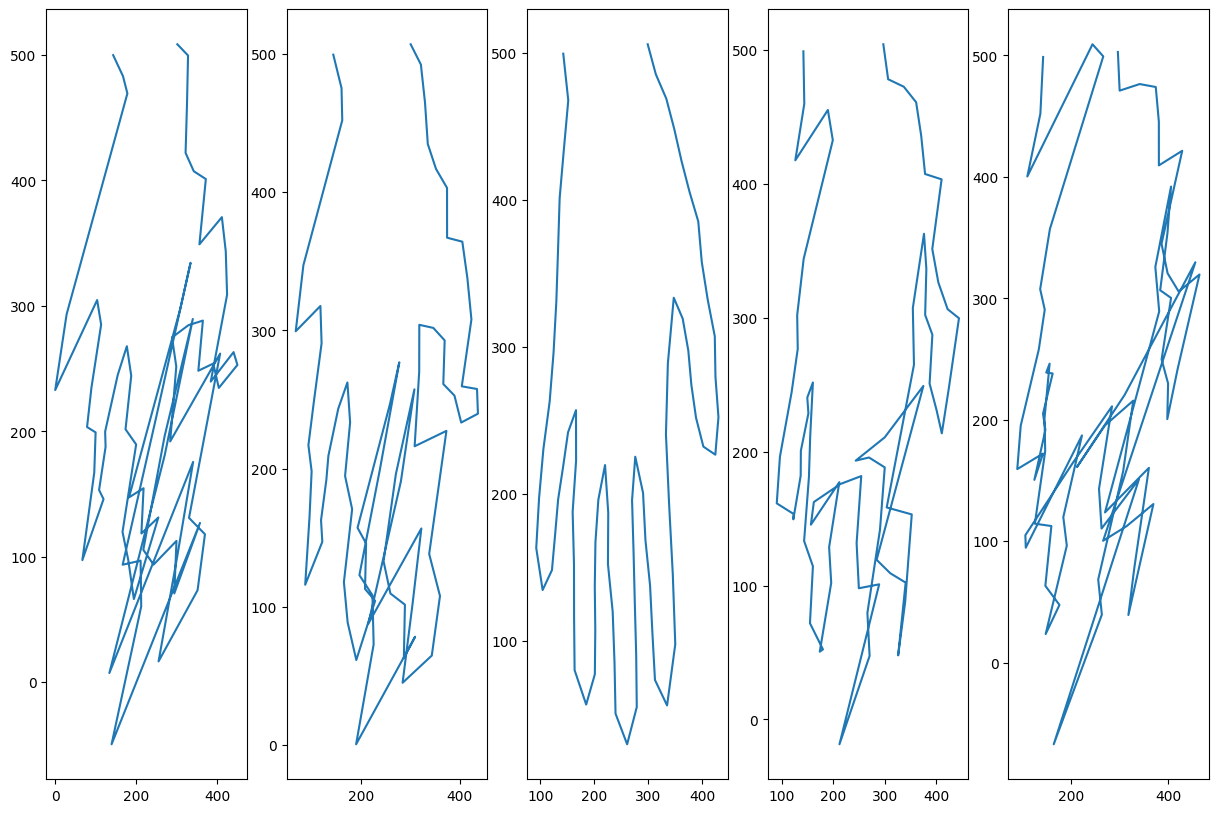

In [ ]:
plot_sequences(s_list_1, eigenvectors[-1], mean) # plot sequences for the first pc

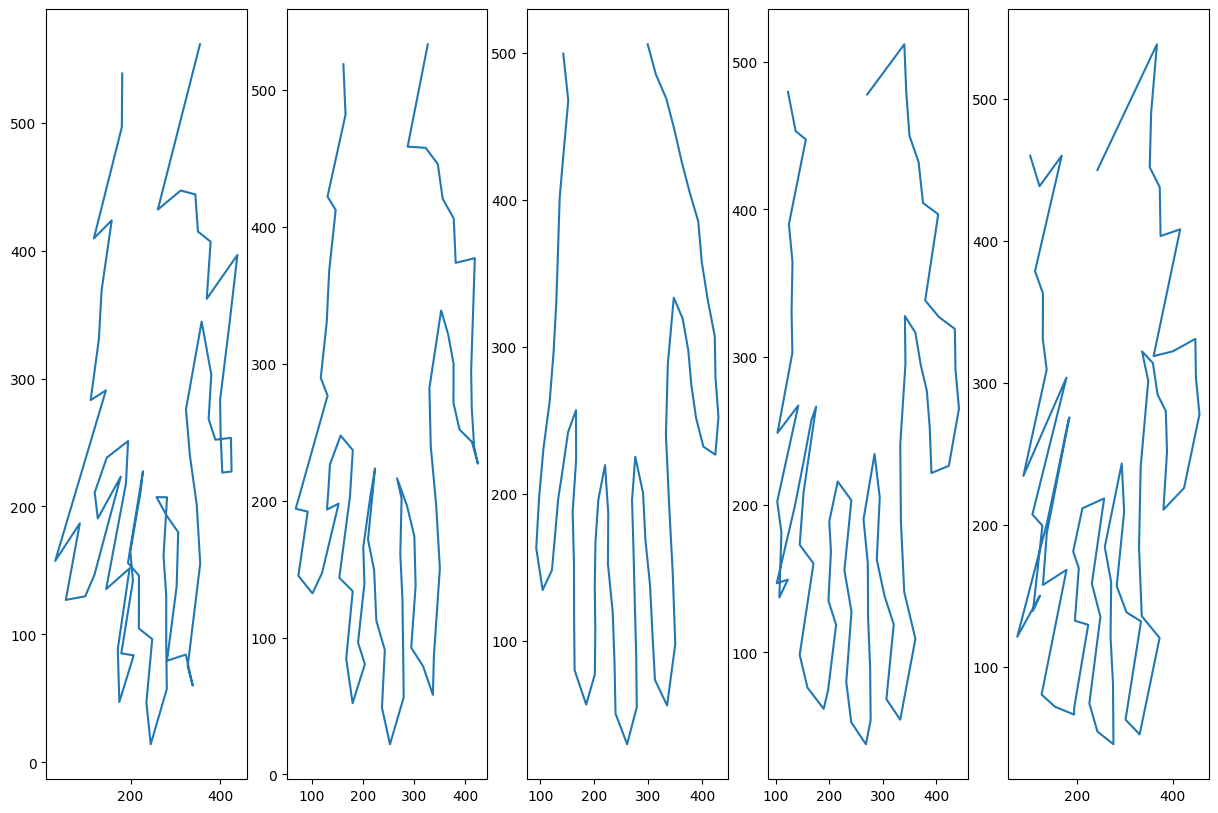

In [ ]:
plot_sequences(s_list_2, eigenvectors[-2], mean) # plot sequences for the second

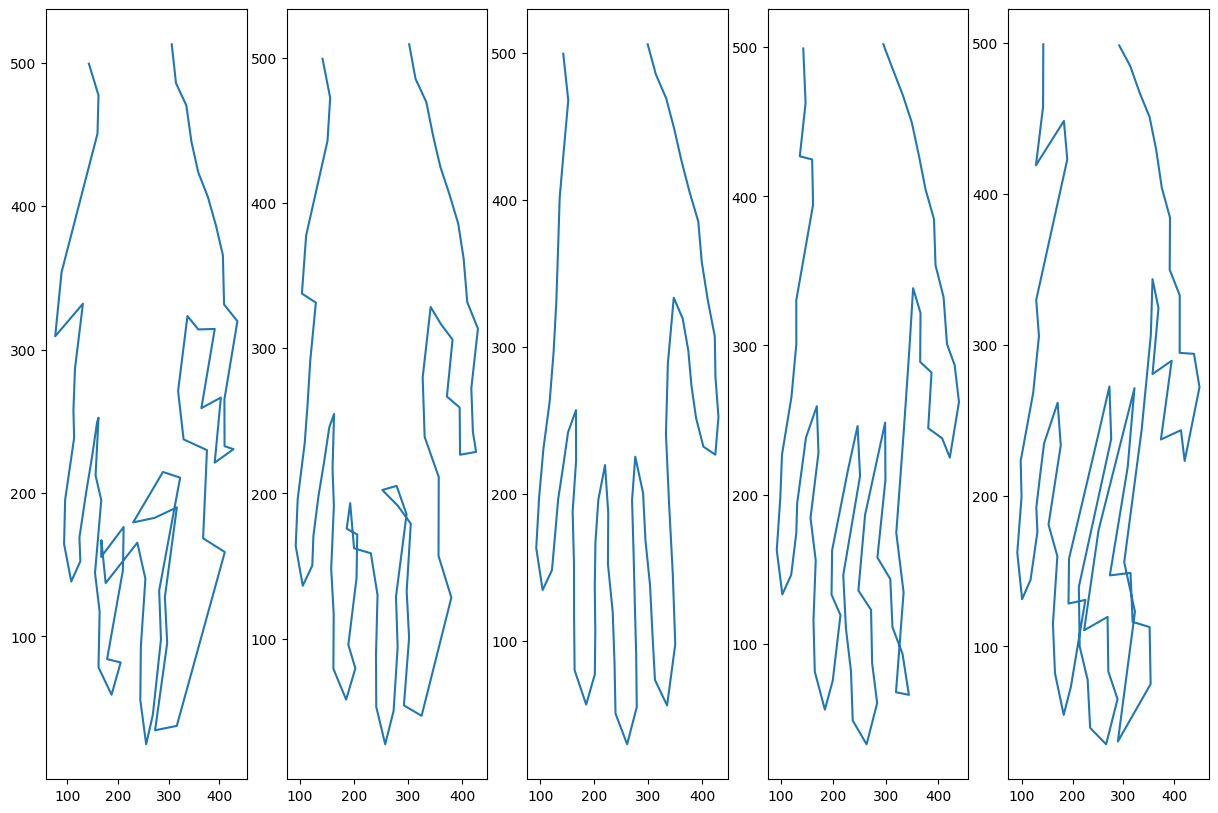

In [ ]:
plot_sequences(s_list_3, eigenvectors[-3], mean) # plot sequences for the third pc

### **(g)**

In [ ]:
"""
This function will find the number of principal
components given a percentage of the variance we want.
@eigenvalues = the eigenvalues calculated from the
               pca algorithm
@threshold = what percentage of variance we want
"""
def find_number_pc(eigenvalues, threshold):
  # setup variables
  sum = 0
  n = len(eigenvalues)

  # loop through each eigenvalues by index
  for i in range(n):

    if sum >= threshold:
      return i

    # add to the sum
    sum += eigenvalues[i] # eigenvalues are in reverse

  return n # default

num_pc = find_number_pc(proportion_of_variance, .95)
print("We need at least", num_pc, "dimensions to achieve a 95% accuracy.")

We need at least 5 dimensions to achieve a 95% accuracy.


### **(h)**

In [ ]:
"""
This function returns the centered data.
@data = data to center
@means = the list of means
"""
def center_data(data, means, reverse = False):
  n_means = len(means)
  m_data = data.shape[0]

  if not reverse: # to center the data
    centered_data = data.copy(deep = True) # copy the data

    # loop through all means
    for i in range(n_means):
      centered_data.loc[:, i] -= means[i]
    return centered_data

  else: # to uncenter the data
    rev_centered_data = data.copy(deep = True)

    # loop through all means
    for i in range(n_means):
      rev_centered_data.loc[:, i] += means[i]
    return rev_centered_data

centered_data = center_data(hand_data, total_mean)

# testing purposes
rev_centered_data = center_data(centered_data, total_mean, True)

print(centered_data.loc[:, 0])
print(hand_data.loc[:, 0])
print(rev_centered_data.loc[:, 0])

0     -2.888889
1    -14.888889
2     -5.888889
3     11.111111
4     35.111111
5     17.111111
6    -14.888889
7     52.111111
8      2.111111
9     18.111111
10   -31.888889
11    -3.888889
12    -6.888889
13   -51.888889
14     5.111111
15   -16.888889
16     1.111111
17     8.111111
Name: 0, dtype: float64
0     296
1     284
2     293
3     310
4     334
5     316
6     284
7     351
8     301
9     317
10    267
11    295
12    292
13    247
14    304
15    282
16    300
17    307
Name: 0, dtype: int64
0     296.0
1     284.0
2     293.0
3     310.0
4     334.0
5     316.0
6     284.0
7     351.0
8     301.0
9     317.0
10    267.0
11    295.0
12    292.0
13    247.0
14    304.0
15    282.0
16    300.0
17    307.0
Name: 0, dtype: float64


In [ ]:
"""
This function projects the principal components to the hand.
@centered_data: the already centered data (pandas dataframe)
@num_pc: number of principal components (scalar/int)
@eigenvectors: the eigenvectors found from running pca (ndarray)
@total_mean: the means of each hand in a single list (list)
"""
def reconstruction_pc(centered_data, num_pc, eigenvectors, total_mean):
  n_eigenvectors = eigenvectors.shape[1]

  # get correct number of eigenvectors
  index_to_start = n_eigenvectors - num_pc # account for ascending order of vectors
  v_matrix = eigenvectors[:, index_to_start:]

  # actually compress the data
  compressed_data = np.matmul(centered_data, v_matrix)

  # reconstruct the data
  reconstructed_centered_data = np.matmul(compressed_data, v_matrix.T)
  weights = compressed_data.loc[0, :]

  # reverse the centering
  decoded_data = center_data(reconstructed_centered_data, total_mean, True)

  print("Shape of decoded_data:", decoded_data.shape)
  return decoded_data, weights

# x_axis_mean, y_axis_mean = project_pc(hand_data, 5, eigenvectors)
decoded_data, weights = reconstruction_pc(centered_data, 5, eigenvectors, total_mean)
print("The weights are\n" + str(weights))

Shape of decoded_data: (18, 144)
The weights are
0    -31.653208
1    -85.527382
2    115.913969
3     53.718561
4    -51.370108
Name: 0, dtype: float64


In [ ]:
"""
This function will parse the data into the
appropriate (x,y) pairs
@data = the data to parse (dataframe)
@hand = which hand to compute (int)

The hand parameter is so that we don't have to compute all the hands.
"""
def parse_data(data, hand):
  # basic setup
  hand_coord = data.loc[hand, :]
  n = len(hand_coord)
  x_axis = [0] * ((int) (n/2))
  y_axis = [0] * ((int) (n/2))

  index = 0 # index to put values in

  # loop through each hand coordinates
  for i in range(n):
    if i % 2 == 0: # if even put in x axis
      x_axis[index] = hand_coord[i]
    else:
      y_axis[index] = hand_coord[i]
      index += 1

  return x_axis, y_axis


x_axis, y_axis = parse_data(hand_data, 0)
x_axis_pc, y_axis_pc = parse_data(decoded_data, 0)


In [ ]:
# Testing purposes
print("Original Data:", hand_data.loc[:, :1])
print("Reconstructed Data:", decoded_data.loc[:, :1])

Original Data:       0    1
0   296  509
1   284  511
2   293  510
3   310  506
4   334  509
5   316  511
6   284  508
7   351  507
8   301  509
9   317  502
10  267  507
11  295  501
12  292  489
13  247  511
14  304  504
15  282  500
16  300  507
17  307  500
Reconstructed Data:              0           1
0   297.271681  505.488837
1   286.690612  507.929566
2   294.085785  509.382775
3   309.217226  508.192848
4   335.492396  509.850386
5   315.650220  509.984951
6   285.742599  505.484228
7   350.703736  505.107858
8   299.974738  511.029256
9   315.852923  505.200568
10  266.625336  507.442719
11  296.891808  499.855819
12  290.343651  497.564459
13  245.659362  512.189130
14  304.458405  502.636655
15  283.462904  495.129403
16  299.915740  506.095641
17  301.960876  502.434899


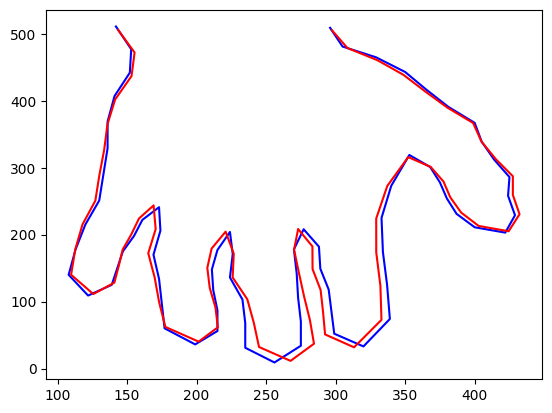

In [ ]:
plt.plot(x_axis, y_axis, color = "blue")
plt.plot(x_axis_pc, y_axis_pc, color = "red")

The reconstructed image looks very similar to the original image, that is, it almost matches. This is expected because the compressed data will not be able to reconstruct the original image completely but we picked enough principal components to do a very good job at reconstructing the data.

In [ ]:
# testing purposes
# test = hand_data.loc[:, 0]
# test2 = pd.concat([test, test], axis = 1)

# print(np.cov(hand_data.T))
# print(np.cov(hand_data.T).shape)

## **Question 2**

In [ ]:
hippocampus_data_path = "./OASIS-hippocampus.csv"

hippocampus_data_full = pd.read_csv(hippocampus_data_path)
# only pick certain columns
hippocampus_data = hippocampus_data_full.loc[:, ["RightHippoVol", "LeftHippoVol", "Dementia"]]
hippocampus_data.head()

,RightHippoVol,LeftHippoVol,Dementia
0,4230,3807,0
1,2896,2801,1
2,2832,2578,0
3,3978,4080,0
4,3557,3495,0


In [ ]:
hippocampus_X_data = hippocampus_data.loc[:, ["RightHippoVol", "LeftHippoVol"]]
hippocampus_y_data = hippocampus_data.loc[:, ["Dementia"]]

print(hippocampus_X_data.head())
print(hippocampus_y_data.head())

   RightHippoVol  LeftHippoVol
0           4230          3807
1           2896          2801
2           2832          2578
3           3978          4080
4           3557          3495
   Dementia
0         0
1         1
2         0
3         0
4         0


### **(a)**

In [ ]:
"""
This function will standardize a dataframe to be a value between 0 and 1.
@data = the data you want to standardize (pandas.DataFrame)
"""
def standardize_dataframe(data):
  m = data.shape[0] # num of examples
  n = data.shape[1] # num of features

  output_data = data.copy()

  # loop through all columns in the data
  for col_name in data.columns:
    column_vector = data.loc[:, col_name]
    min_val = np.min(column_vector, axis = 0)
    max_val = np.max(column_vector, axis = 0)

    output_data[col_name] = output_data[col_name].apply(lambda x: standardize_value(x, min_val, max_val))

  return output_data

# standardizes one value
def standardize_value(x, min, max):
  return (x - min) / (max - min)

standardized_X_data = standardize_dataframe(hippocampus_X_data)

# testing
print("Before:\n", hippocampus_X_data.head())
print("After:\n", standardized_X_data.head())

Before:
    RightHippoVol  LeftHippoVol
0           4230          3807
1           2896          2801
2           2832          2578
3           3978          4080
4           3557          3495
After:
    RightHippoVol  LeftHippoVol
0       0.750137      0.614025
1       0.384658      0.312556
2       0.367123      0.245730
3       0.681096      0.695835
4       0.565753      0.520527


In [ ]:
"""
This function adds the bias to the data.
@data = the data you want to add the bias to (pd.Dataframe)
"""
def add_bias(data):
  # initial setup
  m = data.shape[0]

  bias = np.ones(shape = (m, 1))
  bias_df = pd.DataFrame(data = bias)

  biased_data = pd.concat([data, bias_df], axis = 1)

  return biased_data

hippocampus_X_data_tr = add_bias(standardized_X_data)
print(hippocampus_X_data_tr.head())

   RightHippoVol  LeftHippoVol    0
0       0.750137      0.614025  1.0
1       0.384658      0.312556  1.0
2       0.367123      0.245730  1.0
3       0.681096      0.695835  1.0
4       0.565753      0.520527  1.0


In [ ]:

"""
This function will initialize the beta matrix.
@dim = nuumber of parameters (excluding bias)
@seed = random see
"""
def initialize_beta(dim, seed = 17):
  num_beta = dim + 1 # include bias
  np.random.seed(seed)

  # make a random array of beta values
  return np.random.rand(num_beta, 1)

init_beta = initialize_beta(2)
print(init_beta)


[[0.294665  ]
 [0.53058676]
 [0.19152079]]


### **(b)**

In [54]:
# computes the sigmoid function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [127]:
import math

# negative log-likelihood
def log_likelihood(X_data, y_data, beta):
  loss = 0
  m = y_data.shape[0]
  exp_val = np.exp(-np.matmul(X_data, beta))


  for i in range(m):
    loss += ((y_data[i] - 1) * np.matmul(X_data, beta)) - math.log(1 + exp_val)

  return loss



In [128]:
"""
This function runs the logistic regression algorithm.
"""

def logistic_regression(X_data, y_data, learning_rate, beta_dim, iterations = 1):

  # initialization
  beta = initialize_beta(beta_dim) # initialize the beta

  # do gradient descent
  for iter in range(iterations):
    # loss
    print(log_likelihood(X_data, y_data, beta))

    # forward propagation
    exp_val = np.exp(-np.matmul(X_data, beta))

    # calculate the gradient
    exp_portion = (exp_val / (1 + exp_val)).to_numpy()
    gradients = (y_data - 1).to_numpy() + exp_portion
    gradients = np.sum(np.multiply(gradients, X_data.to_numpy()), axis = 0).reshape((beta_dim + 1, 1))

    # update the parameters
    beta -= learning_rate * gradients

logistic_regression(hippocampus_X_data_tr, hippocampus_y_data, .01, 2, 10)


KeyError: 0

## **Resources**

### **Documentation**

https://numpy.org/

https://seaborn.pydata.org/

https://matplotlib.org/

### **Threads**

https://stackoverflow.com/questions/31726643/how-to-plot-in-multiple-subplots

https://www.geeksforgeeks.org/how-to-create-multiple-subplots-in-matplotlib-in-python/

https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range
